### Fraud Detection

#### Detecting Fradulent Credit Card transactions 

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Data

In [2]:
data = pd.read_csv('Dataset/creditcard.csv')

In [4]:
data.shape

(284807, 31)

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


C:\Users\abyanjan.FSE17-32\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


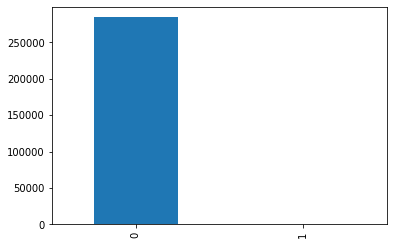

In [8]:
# Target distribution
data.Class.value_counts().plot('bar')

In [11]:
data.Class.value_counts(normalize = True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

Only around 0.17% of the transactions ara fradulent, therefore we have highly imbalance data.

#### Data Preprocessing

All the features have been standardised except for the Amount column, so we will need to standardised it to bring it into the dame range.

In [16]:
from sklearn.preprocessing import StandardScaler

data['normalized_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [17]:
# drop the original Amount column and Time column
data.drop(['Amount', 'Time'], axis = 1, inplace = True)

In [18]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### Data Partition

In [21]:
from sklearn.model_selection import train_test_split

#input features
X = data.drop('Class', axis = 1)

# target
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [22]:
X_train.shape, X_test.shape

((199364, 29), (85443, 29))

In [23]:
# converting to arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### Deep Neural Network

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [29]:
model = Sequential()
model.add(Dense(units = 16, input_dim= 29, activation = 'relu'))
model.add(Dense(units =24, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units =20 , activation = 'relu'))
model.add(Dense(units =24, activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [30]:
# compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs = 5, batch_size = 15)

Train on 199364 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
199364/199364 [==============================] - 54s 272us/sample - loss: 0.0088 - accuracy: 0.9988
Epoch 2/5
199364/199364 [==============================] - 54s 271us/sample - loss: 0.0040 - accuracy: 0.9992
Epoch 3/5
199364/199364 [==============================] - 54s 272us/sample - loss: 0.0037 - accuracy: 0.9994
Epoch 4/5
199364/199364 [==============================] - 53s 267us/sample - loss: 0.0034 - accuracy: 0.9993
Epoch 5/5
199364/199364 [==============================] - 53s 268us/sample - loss: 0.0031 - accuracy: 0.9993


In [40]:
from sklearn.metrics import accuracy_score
#score = model.evaluate(X_test, y_test)
pred_test = model.predict_classes(X_test)

# Accuracy
score = accuracy_score(y_test, pred_test)
print(f'Accuracy on test set: {round(score,4)}')

Accuracy on test set: 0.9994


In [42]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, pred_test)
print(conf_mat)

[[85272    24]
 [   28   119]]


From the confusion matrix, we can see that the model was able to identify almost all the non fradulent transactions corretly, only missing 24 of them. For the fradulent class it misclassified 28 out of total 147. Since, the fraudlent cases are more expensive, we would like to make more mistakes on classifying them.

In [55]:
# AUC score
from sklearn.metrics import roc_auc_score
pred_test_prob = model.predict(X_test)

auc_score = roc_auc_score(y_test, pred_test_prob)

print(f'Auc Score: {round(auc_score,3)}')

Auc Score: 0.965


### Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

Rf_model = RandomForestClassifier(n_estimators=100)
Rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
# predict on test set
y_pred_class = Rf_model.predict(X_test)

In [65]:
# confusion matrix
print(confusion_matrix(y_test, y_pred_class))

[[85289     7]
 [   33   114]]


It is not doing any better than the Deep Neural network.

In [66]:
# Auc score
y_pred = Rf_model.predict_proba(X_test)[:,1]
print(f'AUC score: {roc_auc_score(y_test, y_pred)}')

AUC score: 0.9370421705542094


### Undersampling

In [67]:
# fradulent transactions
fraud_indices = np.array(data[data.Class == 1].index)
num_fraud_records = len(fraud_indices)
print(num_fraud_records)

492


In [69]:
# non fradulent trainsactions
non_fraud_indices =np.array(data[data.Class == 0].index)
num_non_fraud_records = len(non_fraud_indices)
print(num_non_fraud_records)

284315


In [70]:
# taking random sample of non fraudlent data to match the number of fraudulent records
random_samples = np.random.choice(non_fraud_indices, num_fraud_records, replace = False)
random_samples = np.array(random_samples)
print(len(random_samples))

492


In [72]:
# concatenate the random non fradulent samples with fraudlent records
undersample_indices = np.concatenate([fraud_indices, random_samples])
print(len(undersample_indices))

984


In [73]:
undersample_df = data.iloc[undersample_indices,:]

In [75]:
X_under = undersample_df.drop('Class', axis = 1)
y_under = undersample_df['Class']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size =0.3 , random_state = 0)

In [77]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [78]:
# Deep learning
model = Sequential()
model.add(Dense(units = 16, input_dim= 29, activation = 'relu'))
model.add(Dense(units =24, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units =20 , activation = 'relu'))
model.add(Dense(units =24, activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_7 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_9 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [80]:
# compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs = 5, batch_size = 15)

Train on 688 samples
Epoch 1/5
688/688 [==============================] - 1s 2ms/sample - loss: 0.2444 - accuracy: 0.9244
Epoch 2/5
688/688 [==============================] - 0s 212us/sample - loss: 0.2226 - accuracy: 0.9157
Epoch 3/5
688/688 [==============================] - 0s 227us/sample - loss: 0.1900 - accuracy: 0.9331
Epoch 4/5
688/688 [==============================] - 0s 250us/sample - loss: 0.1757 - accuracy: 0.9346
Epoch 5/5
688/688 [==============================] - 0s 211us/sample - loss: 0.1831 - accuracy: 0.9419


In [83]:
# prediction
y_pred_class = model.predict_classes(X_test)

# confusion_matrix
print(confusion_matrix(y_test, y_pred_class))

[[144   5]
 [ 15 132]]


In [84]:
# Accuracy
print(accuracy_score(y_test, y_pred_class))

0.9324324324324325


In [85]:
# Auc
y_pred = model.predict(X_test)
print(roc_auc_score(y_test, y_pred))

0.9828334018171027


We can see we have much better auc score then before.

### SMOTE Sampling

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
X_resample, y_resample = SMOTE().fit_sample(X, y)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3, random_state=0)

In [96]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [97]:
# compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs = 5, batch_size = 15)

Train on 398041 samples
Epoch 1/5
398041/398041 [==============================] - 92s 231us/sample - loss: 0.0427 - accuracy: 0.9851
Epoch 2/5
398041/398041 [==============================] - 89s 225us/sample - loss: 0.0175 - accuracy: 0.9953
Epoch 3/5
398041/398041 [==============================] - 90s 226us/sample - loss: 0.0143 - accuracy: 0.9962
Epoch 4/5
398041/398041 [==============================] - 90s 227us/sample - loss: 0.0119 - accuracy: 0.9969
Epoch 5/5
398041/398041 [==============================] - 89s 223us/sample - loss: 0.0107 - accuracy: 0.9973


In [98]:
# prediction
y_pred_class = model.predict_classes(X_test)

# confusion_matrix
print(confusion_matrix(y_test, y_pred_class))

[[84887   285]
 [   44 85373]]


In [99]:
# Accuracy
print(accuracy_score(y_test, y_pred_class))

0.998071387955847


In [100]:
# Auc
y_pred = model.predict(X_test)
print(roc_auc_score(y_test, y_pred))

0.9997849596427737


With SMOTE oversampling we have the best AUC score.